In [1]:
## Created new column by dividing the date column to date and time columns in bash:
## cat dilans_data.csv | sed -i 's//;/1' > /home/adammanhercz/dilans_data.csv

## Importing libraries - Pandas, NumPy, Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading the files
## Creating 3 csv files in bash:
## cat dilan_data.csv | grep 'read' > /home/adammanhercz/dilans_read.csv
## cat dilan_data.csv | grep 'subscribe' > /home/adammanhercz/dilans_sub.csv
## cat dilan_data.csv | grep 'buy' > /home/adammanhercz/dilans_buy.csv

read= pd.read_csv("dilans_read.csv", delimiter=";",  names=["date", "time", "event_type", "country", "user_id", "source", "topic"])
sub = pd.read_csv("dilans_sub.csv", delimiter=";", names=["date", "time", "event_type", "user_id"])
buy = pd.read_csv("dilans_buy.csv", delimiter=";", names=["date", "time", "event_type","user_id", "payment"])

In [3]:
## Funnel1: First time readers

first = read.loc[read.event_type == "read"]
first = first.loc[(first.source == "SEO") | (first.source == "AdWords") | (first.source == "Reddit")]
first

,date,time,event_type,country,user_id,source,topic
0,2018-01-01,00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01,00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01,00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01,00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01,00:05:03,read,country_8,2458151265,Reddit,North America
...,...,...,...,...,...,...,...
581731,2018-03-30,23:57:06,read,country_1,2458361279,SEO,North America
581735,2018-03-30,23:58:54,read,country_6,2458361280,AdWords,Asia
581738,2018-03-30,23:59:13,read,country_8,2458361281,AdWords,Europe
581742,2018-03-30,23:59:40,read,country_5,2458361282,AdWords,Europe


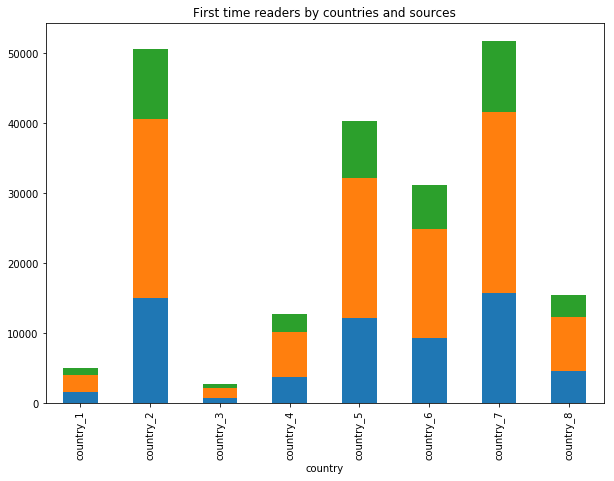

In [4]:
##First time readers by countries and sources

first.groupby(["country", "source"]).count()[["event_type"]].unstack().plot(kind="bar",legend=False, stacked=True, title="First time readers by countries and sources",figsize=(10,7))

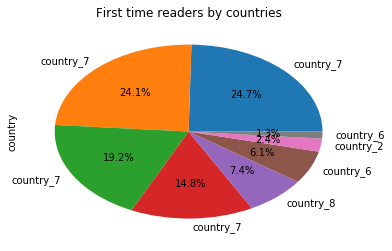

In [5]:
## 82,8% of the first time readers are coming from 4 countries(Country_7,Country_2,Country_5, Country_6)

first.country.value_counts().plot(kind="pie", labels=first["country"], autopct='%1.1f%%', title="First time readers by countries")

In [6]:
first.country.value_counts()

country_7    51791
country_2    50675
country_5    40349
country_6    31156
country_8    15483
country_4    12751
country_1     5076
country_3     2742
Name: country, dtype: int64

In [7]:
## Frist time readers by sources 
first.source.value_counts()

Reddit     105216
AdWords     63065
SEO         41742
Name: source, dtype: int64

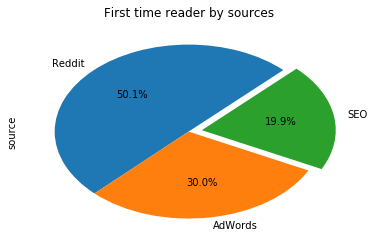

In [8]:
## Frist time readers by sources (Dilan's marketing budget percentage: AdWords 50%, Reddit 25%, SEO 25%)

first.source.value_counts().plot(kind="pie", autopct='%1.1f%%', 
 startangle=45, title="First time reader by sources", explode=(0,0,0.1))

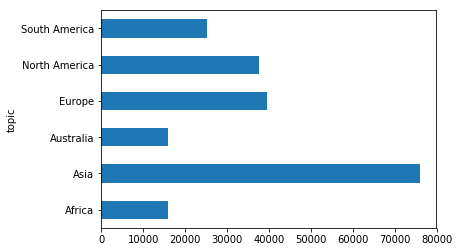

In [9]:
## Frist time reader by topics

first.groupby("topic").count()[["event_type"]].plot(kind="barh", legend=False)

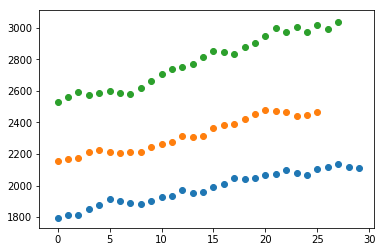

In [10]:
## Number of first time reader by month

jan_first = first.loc[first.date < "2018-01-31"].groupby("date", as_index=False).count()[["event_type"]]
feb_first = first.loc[(first.date > "2018-02-01") & (first.date < "2018-02-28")].groupby("date", as_index=False).count()[["event_type"]]
march_first = first.loc[(first.date > "2018-03-01") & (first.date < "2018-03-30")].groupby("date",as_index=False).count()[["event_type"]]

plt.scatter(x = jan_first.index, y=jan_first.event_type)
plt.scatter(x = feb_first.index, y=feb_first.event_type)
plt.scatter(x = march_first.index, y=march_first.event_type)

In [11]:
## Creating "Returning readers" group 

readers = read.loc[read.event_type == "read"]

readers = readers.loc[(readers.source == "Africa") | (readers.source == "Europe") | (readers.source == "South America") |\
                      (readers.source == "North America") |\
                      (readers.source == "Australia") |  (readers.source == "Asia")].reset_index(drop=True)
readers.drop(readers.columns[[6]], 1, inplace=True)

readers = readers.rename(columns={"source":"topic"})

## Drop user_id duplicates to have the real number of returning readers
readers = readers.drop_duplicates(subset="user_id", keep="first").reset_index(drop=True)

## Funnel2: Returning readers
readers


,date,time,event_type,country,user_id,topic
0,2018-01-01,02:20:18,read,country_5,2458151287,North America
1,2018-01-01,02:53:39,read,country_4,2458151279,Asia
2,2018-01-01,03:34:22,read,country_4,2458151525,Africa
3,2018-01-01,03:40:42,read,country_5,2458151315,South America
4,2018-01-01,03:51:23,read,country_5,2458151302,South America
...,...,...,...,...,...,...
66226,2018-03-31,04:34:32,read,country_4,2458361163,Africa
66227,2018-03-31,05:02:06,read,country_6,2458361177,Asia
66228,2018-03-31,05:02:14,read,country_7,2458361244,North America
66229,2018-03-31,05:03:53,read,country_7,2458361267,Europe


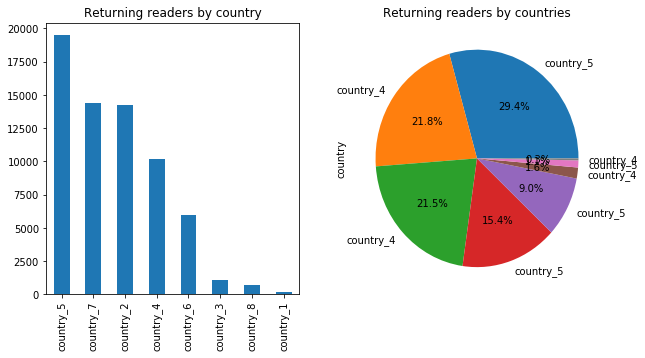

In [12]:
## Returning readers by countries - 
plt.subplot(121)
readers.country.value_counts().plot(kind="bar", figsize=(10,5), title="Returning readers by country")

plt.subplot(122)
readers.country.value_counts().plot(kind="pie", labels=readers["country"], autopct='%1.1f%%', title="Returning readers by countries")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda6d0ca3c8>],
      dtype=object)

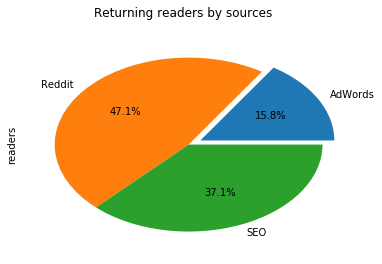

In [13]:
## Returning readers by sources

first["readers"] = first.user_id.isin(readers.user_id).apply(lambda x: 1 if x == True else 0).fillna(0)

first.loc[first["readers"] == 1].groupby("source").sum()[["readers"]].plot(kind="pie", legend=False, subplots=True, autopct='%1.1f%%', explode=(0.1,0,0), title="Returning readers by sources" )

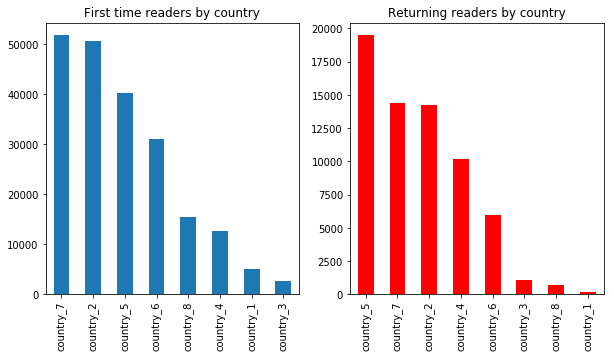

In [14]:
## First time readers & returning readers by countries

plt.subplot(121)
first.country.value_counts().plot(kind="bar", figsize=(10,5), title="First time readers by country")

plt.subplot(122)
readers.country.value_counts().plot(kind="bar", figsize=(10,5), title="Returning readers by country", color="r")

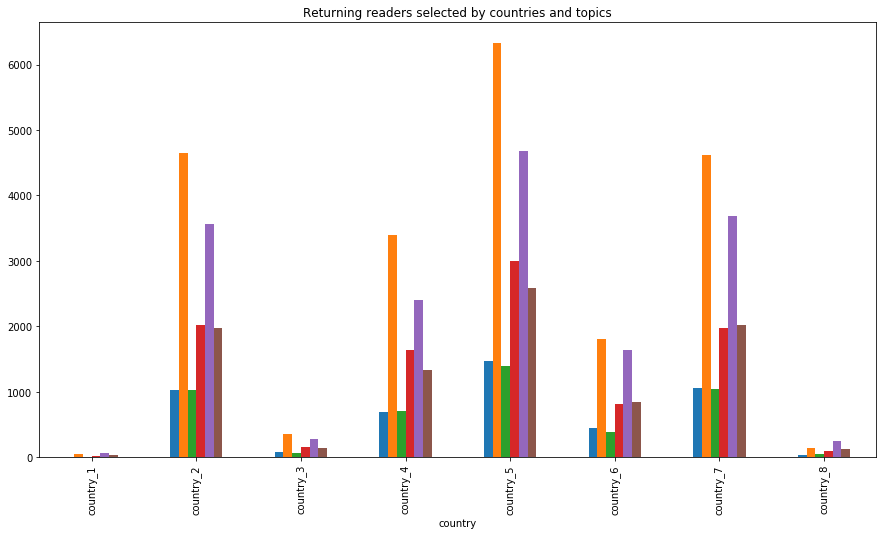

In [15]:
##Returnig readers by countries and topics

readers.groupby(["country", "topic"]).count()[["event_type"]].unstack().plot(kind="bar", figsize=(15,8), legend=False, title="Returning readers selected by countries and topics")

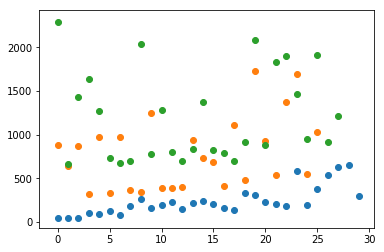

In [16]:
jan_readers = readers.loc[readers.date < "2018-01-31"].groupby("date", as_index=False).count()[["event_type"]]
feb_readers = readers.loc[(readers.date > "2018-02-01") & (readers.date < "2018-02-28")].groupby("date", as_index=False).count()[["event_type"]]
march_readers = readers.loc[(readers.date > "2018-03-01") & (readers.date < "2018-03-30")].groupby("date",as_index=False).count()[["event_type"]]

plt.scatter(x = jan_readers.index, y=jan_readers.event_type)
plt.scatter(x = feb_readers.index, y=feb_readers.event_type)
plt.scatter(x = march_readers.index, y=march_readers.event_type)

In [17]:
##Creating the Subscribers group

##Total number of subscribers: 7618
sub

,date,time,event_type,user_id
0,2018-01-01,00:07:41,subscribe,2458151268
1,2018-01-01,00:07:44,subscribe,2458151267
2,2018-01-01,00:40:55,subscribe,2458151309
3,2018-01-01,01:26:26,subscribe,2458151358
4,2018-01-01,01:30:39,subscribe,2458151361
...,...,...,...,...
7613,2018-03-30,22:58:30,subscribe,2458272661
7614,2018-03-30,23:05:11,subscribe,2458258357
7615,2018-03-30,23:09:25,subscribe,2458338958
7616,2018-03-30,23:27:52,subscribe,2458339595


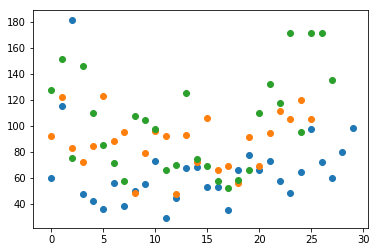

In [18]:
jan_sub = sub.loc[sub.date < "2018-01-31"].groupby("date", as_index=False).count()[["event_type"]]
feb_sub = sub.loc[(sub.date > "2018-02-01") & (sub.date < "2018-02-28")].groupby("date", as_index=False).count()[["event_type"]]
march_sub = sub.loc[(sub.date > "2018-03-01") & (sub.date < "2018-03-30")].groupby("date",as_index=False).count()[["event_type"]]

plt.scatter(x = jan_sub.index, y=jan_sub.event_type)
plt.scatter(x = feb_sub.index, y=feb_sub.event_type)
plt.scatter(x = march_sub.index, y=march_sub.event_type)

In [19]:
first[["subscriber","readers"]].corr()

KeyError: "['subscriber'] not in index"

In [20]:
##Creating the "buy" group

buy

,date,time,event_type,user_id,payment
0,2018-01-01,04:04:59,buy,2458151555,8
1,2018-01-01,09:28:00,buy,2458151933,8
2,2018-01-01,13:23:16,buy,2458152245,8
3,2018-01-01,14:20:43,buy,2458152315,8
4,2018-01-01,16:56:04,buy,2458152371,8
...,...,...,...,...,...
8402,2018-03-30,20:22:46,buy,2458330984,80
8403,2018-03-30,21:33:49,buy,2458180092,8
8404,2018-03-30,22:52:29,buy,2458331539,80
8405,2018-03-30,23:11:30,buy,2458339835,80


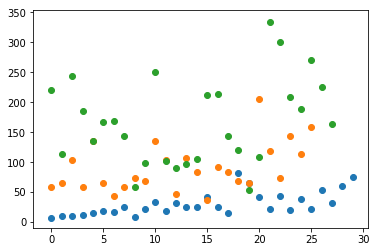

In [21]:
jan_buy = buy.loc[buy.date < "2018-01-31"].groupby("date", as_index=False).count()[["event_type"]]
feb_buy = buy.loc[(buy.date > "2018-02-01") & (buy.date < "2018-02-28")].groupby("date", as_index=False).count()[["event_type"]]
march_buy = buy.loc[(buy.date > "2018-03-01") & (buy.date < "2018-03-30")].groupby("date",as_index=False).count()[["event_type"]]

plt.scatter(x = jan_buy.index, y=jan_buy.event_type)
plt.scatter(x = feb_buy.index, y=feb_buy.event_type)
plt.scatter(x = march_buy.index, y=march_buy.event_type)

In [22]:
## Subscribers who purchased - it shows also the real number of the purchasing users(6648)
## buyer = buy.drop_duplicates(subset="user_id") - It is also a solution to get the list of these users

sub["sub_buyer"] = buy["user_id"].isin(sub["user_id"])
sub["sub_ buyer"] = sub["sub_buyer"].apply(lambda x: 1 if x == True else 0)
buyer = sub.loc[sub["sub_buyer"] == 1]

real = buy.drop_duplicates(subset="user_id")


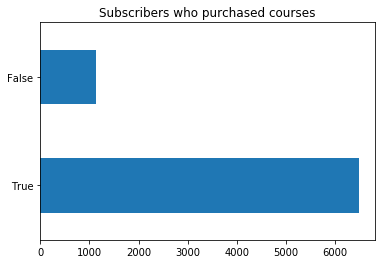

In [23]:
sub.sub_buyer.value_counts().plot(kind="barh", title="Subscribers who purchased courses")

In [24]:
## Users who bought the 8$ course
buy_8 = buy.loc[buy.payment == 8.0]

## Putting the 8$ course purchasing users to the main df.
first["course_8"] = first.user_id.isin(buy_8.user_id).apply(lambda x: 1 if x == True else 0)

## Number of users purchased 8$ course
first.user_id.isin(buy_8.user_id).sum()

6640

In [25]:
## Users who bought the 80$ course
buy_80 = buy.loc[buy.payment == 80.0]

## Putting the 80$ course purchasing users to the main df.
first["course_80"] = first.user_id.isin(buy_80.user_id).apply(lambda x: 1 if x == True else 0)

## Number of users purchased 80$ course
first.user_id.isin(buy_80.user_id).sum()

1767

In [26]:
## Putting the purchasing users to the main df.
first["buyer"] = first.user_id.isin(real.user_id)
first["buyer"] = first["buyer"].fillna(0)
first["buyer"] = first["buyer"].apply(lambda x: 1 if x == True else 0)
first["buyer"].value_counts()

0    203375
1      6648
Name: buyer, dtype: int64

In [27]:
## Purchasing users by countries
first.loc[first["buyer"] == 1].groupby("country", as_index=False).count()[["buyer","country"]]

,buyer,country
0,25,country_1
1,1443,country_2
2,112,country_3
3,1096,country_4
4,1971,country_5
5,535,country_6
6,1381,country_7
7,85,country_8


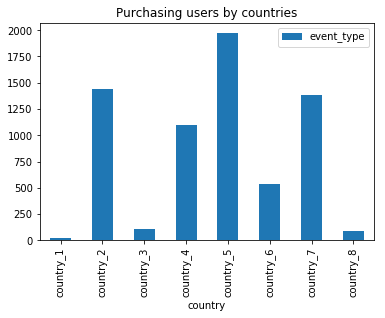

In [28]:
## Purchasing users by countries
first.loc[first["buyer"] == 1,:].groupby("country").count()[["event_type"]].plot(kind="bar",title="Purchasing users by countries")

In [29]:
## Putting the subscribing users to the main df.
first["subscriber"] = first.user_id.isin(sub.user_id).apply(lambda x: 1 if x == True else 0)

In [30]:
## Correlation between the subscribing and the purchasing users
first[["subscriber", "buyer"]].corr()

,subscriber,buyer
subscriber,1.000000,0.703276
buyer,0.703276,1.000000


In [31]:
## Subscribing users by countries
first.loc[first["subscriber"] == 1].groupby("country", as_index=False).count()[["subscriber", "country"]]

,subscriber,country
0,28,country_1
1,1558,country_2
2,160,country_3
3,1419,country_4
4,2334,country_5
5,546,country_6
6,1470,country_7
7,103,country_8


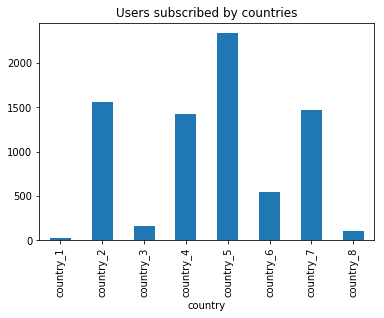

In [32]:
##Subscribing users by countries
first.loc[first["subscriber"] == 1].groupby("country").count()[["event_type"]].plot(kind="bar",legend=False,title="Users subscribed by countries")

In [33]:
## Finding the users who bought both of the courses 
buy["double"] = buy_8.user_id.isin(buy_80.user_id).apply(lambda x: 1 if x == True else 0)
buy["double"] = buy["double"].fillna(0)
buy["double"] = buy["double"].astype(int)

## Then putting them into the main df.
double = buy.loc[buy["double"] == 1]
first["double"] = first.user_id.isin(double.user_id).apply(lambda x: 1 if x == True else 0)

## Number of users who bought both of the courses
first["double"].sum()

1759

In [34]:
## Correlation between the customers and the customers who bought both of the courses
first[["double", "buyer"]].corr()

,double,buyer
double,1.000000,0.508311
buyer,0.508311,1.000000


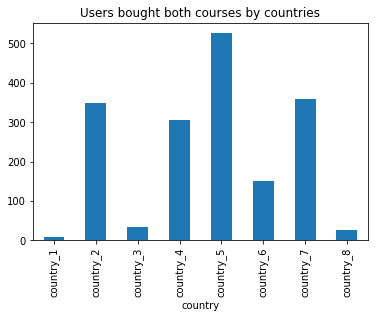

In [35]:
first.loc[first["double"]==1].groupby("country").count()[["event_type"]].plot(kind="bar",legend=False, title="Users bought both courses by countries")

In [36]:
##Users bought both courses by sources
first.loc[first["double"]==1].groupby("source").sum()[["buyer"]]

,buyer
source,
AdWords,242
Reddit,809
SEO,708


In [37]:
##Users subscribed by sources
first.loc[first["subscriber"] == 1].groupby("source").count()[["event_type"]]

,event_type
source,
AdWords,1072
Reddit,3443
SEO,3103


In [38]:
##Purchasing users by sources - segmented by 8$ and 80$ courses
first.loc[first["buyer"] == 1,:].groupby("source").sum()[["course_80", "course_8"]]

,course_80,course_8
source,,
AdWords,243,1028
Reddit,813,3090
SEO,711,2522


In [39]:
## First time reader by sources
first.source.value_counts()

Reddit     105216
AdWords     63065
SEO         41742
Name: source, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda6c9a2cc0>],
      dtype=object)

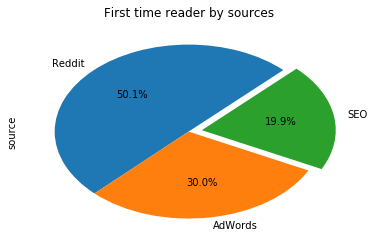

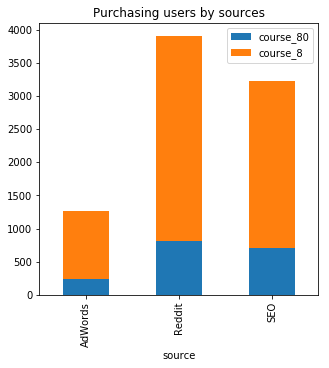

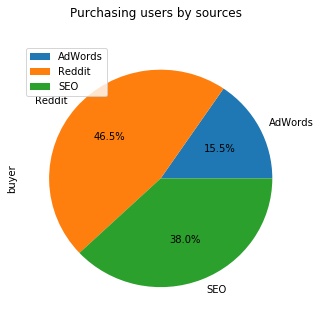

In [40]:
## First time reader by sources
first.source.value_counts().plot(kind="pie", autopct='%1.1f%%', 
 startangle=45, title="First time reader by sources", explode=(0,0,0.1))

## Purchasing users by sources
first.loc[first["buyer"] == 1,:].groupby("source").sum()[["course_80", "course_8"]].plot(kind="bar", figsize=(5,5),legend="False", stacked=True, title="Purchasing users by sources")

first.loc[first["buyer"] == 1,:].groupby("source").sum()[["buyer"]].plot(kind="pie",autopct='%1.1f%%', figsize=(5,5),legend="False", subplots=True, title="Purchasing users by sources")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda6c8ddef0>],
      dtype=object)

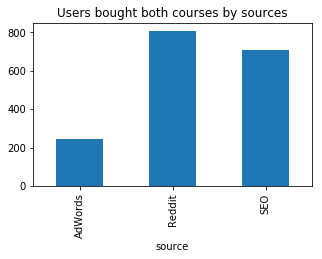

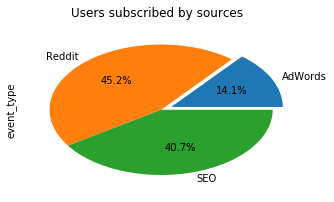

In [41]:
## Users bought both courses by sources
first.loc[first["double"]==1].groupby("source").count()[["event_type"]].plot(kind="bar",figsize=(5,3),legend=False
                                                                             ,title="Users bought both courses by sources")

## Users subscribed by sources
first.loc[first["subscriber"] == 1].groupby("source").count()[["event_type"]].plot(kind="pie",autopct='%1.1f%%',subplots=True, explode=(0.1,0,0), figsize=(5,3),legend=False, title="Users subscribed by sources")

In [42]:
## Users bought both courses by sources
first.loc[first["double"]==1].groupby("source").count()[["event_type"]]

,event_type
source,
AdWords,242
Reddit,809
SEO,708


In [43]:
## Purchasing and subscribing users by topics

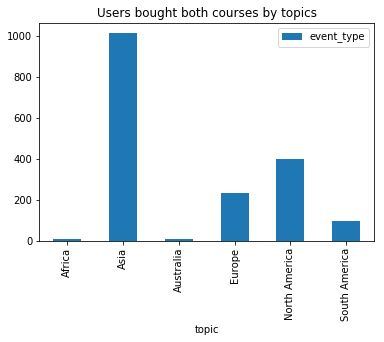

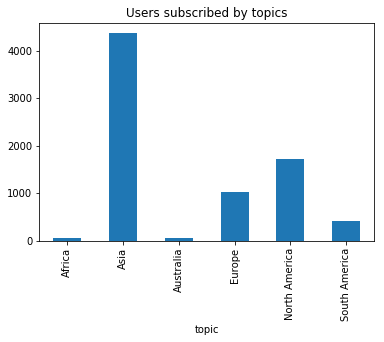

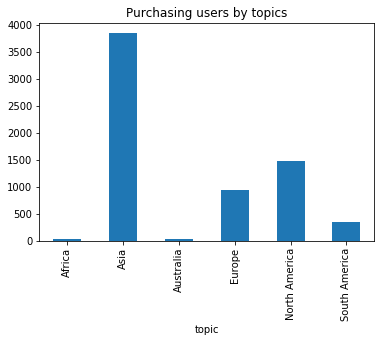

In [44]:
first.loc[first["double"]==1].groupby("topic").count()[["event_type"]].plot(kind="bar", title="Users bought both courses by topics")

first.loc[first["subscriber"] == 1].groupby("topic").count()[["event_type"]].plot(kind="bar",legend=False,title="Users subscribed by topics")

first.loc[first["buyer"] == 1].groupby("topic").count()[["event_type"]].plot(kind="bar",legend=False,title="Purchasing users by topics")

In [45]:
## Predictions

In [46]:
purchase= first.loc[first.buyer == 1].groupby("date", as_index=False).sum()[["date","buyer","course_80","course_8"]]

In [47]:
purchase

,date,buyer,course_80,course_8
0,2018-01-01,84,28,83
1,2018-01-02,76,25,76
2,2018-01-03,54,13,54
3,2018-01-04,83,24,83
4,2018-01-05,81,29,81
...,...,...,...,...
79,2018-03-21,119,28,119
80,2018-03-22,98,12,98
81,2018-03-23,119,12,118
82,2018-03-24,124,0,124


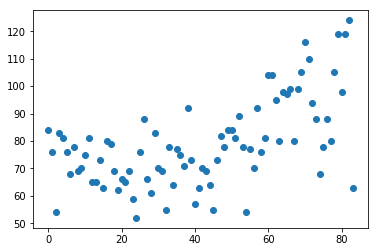

In [48]:
plt.scatter(purchase.index, purchase.buyer)

In [49]:
purchase[["buyer","course_8"]].corr()

,buyer,course_8
buyer,1.000000,0.999785
course_8,0.999785,1.000000


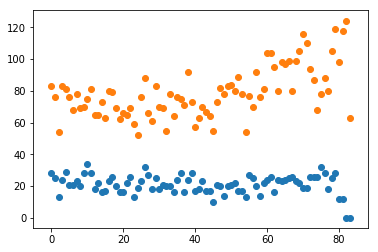

In [50]:
plt.scatter(purchase.index, purchase.course_80)
plt.scatter(purchase.index, purchase.course_8)

In [51]:
x_buyer = purchase.index

In [52]:
y_buyer = purchase.buyer
y_buyer.max()

124

In [53]:
## Prediction on purchasing users

In [54]:
coefs_buyer = np.polyfit(x_buyer, y_buyer, 2)
predict_buyer = np.poly1d(coefs_buyer)

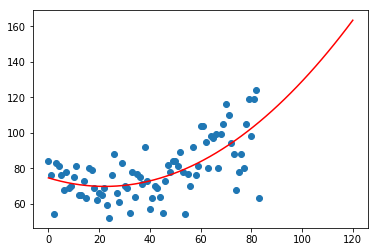

In [55]:
x_test_buyer = np.linspace(0, 120)
y_pred_buyer = predict_buyer(x_test_buyer[:, None])
plt.scatter(x_buyer,y_buyer)
plt.plot(x_test_buyer, y_pred_buyer, c = 'r')
plt.show()

In [56]:
predict_buyer(82)

104.75634466731498

In [57]:
predict_buyer(140)

205.5958090698232

In [58]:
purchase.buyer.tail()

79    119
80     98
81    119
82    124
83     63
Name: buyer, dtype: int64

In [59]:
from sklearn.metrics import r2_score
r2_score(y_buyer, predict_buyer(x_buyer))

0.43406220143609675

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## MSE_buyer - Mean Squared Error
mean_squared_error(y_buyer, predict_buyer(y_buyer))

641.1372799507085

In [61]:
## MAE_buyer - Mean Absolute Error
mean_absolute_error(y_buyer, predict_buyer(y_buyer))

24.84032075445247

In [62]:
## MAPE_buyer - Mean Absolute Percentage Error
mean_absolute_percentage_error(y_buyer, predict_buyer(y_buyer))

0.31897008252211906

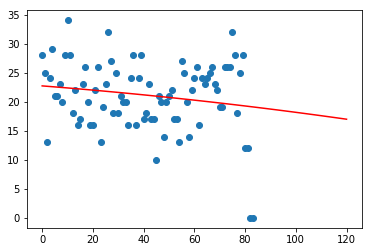

In [63]:
## Prediction on 80$ course purchasing

x_80 = purchase.index
y_80 = purchase.course_80

coefs_80 = np.polyfit(x_80, y_80, 2)
predict_80 = np.poly1d(coefs_80)

x_test = np.linspace(0, 120)
y_pred = predict_80(x_test[:, None])
plt.scatter(x_80,y_80)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [64]:
r2_score(y_80, predict_80(x_80))

0.03136280130417879

In [65]:
## MSE_80 - Mean Squared Error
mean_squared_error(y_80, predict_80(y_80))

39.22597085239648

In [66]:
## MAE_80 - Mean Absolute Error
mean_absolute_error(y_80, predict_buyer(y_80))

49.06270825259763

In [67]:
## MAPE_80 - Mean Absolute Percentage Error
mean_absolute_percentage_error(y_80, predict_80(y_80))

2435313210656841.0

In [68]:
## ROI per source costs

In [69]:
investment = first.loc[first["buyer"] == 1,:].groupby("source").sum()[["course_80", "course_8"]]

In [70]:
investment["sum_80"] = investment["course_80"] * 80 

In [71]:
investment["sum_8"] = investment["course_8"] * 8

In [72]:
investment["sum"] = investment["sum_80"] + investment["sum_8"]

In [73]:
investment["cost_period"] = [1500,750,750]

In [74]:
investment["roi"] = (investment["sum"] - investment["cost_period"]) / investment["cost_period"]

In [75]:
investment

,course_80,course_8,sum_80,sum_8,sum,cost_period,roi
source,,,,,,,
AdWords,243,1028,19440,8224,27664,1500,17.442667
Reddit,813,3090,65040,24720,89760,750,118.680000
SEO,711,2522,56880,20176,77056,750,101.741333


In [76]:
## Table of countries by each funnel

In [77]:
country_funnel = first.groupby("country").count()[["event_type"]]

In [78]:
country_funnel = country_funnel.rename(columns={"event_type":"first"})

In [79]:
country_funnel["readers"] = readers.groupby("country").count()[["event_type"]]

In [80]:
country_funnel["%_first_readers"] = country_funnel["readers"] / country_funnel["first"] 

In [81]:
country_funnel["sub"] = first.loc[first["subscriber"] == 1].groupby("country").count()[["event_type"]]

In [82]:
country_funnel["%_readers_sub"] = country_funnel["sub"] / country_funnel["readers"] 

In [83]:
country_funnel["buy"] = first.loc[first["buyer"] == 1].groupby("country").count()[["event_type"]]

In [84]:
country_funnel["%_sub_buy"] = country_funnel["buy"] / country_funnel["sub"] 

In [85]:
country_funnel["%_first_buy"] = country_funnel["buy"] / country_funnel["first"] 

In [86]:
country_funnel.style.format({
    "%_first_readers": '{:,.2%}'.format,
    "%_readers_sub": '{:,.2%}'.format,
    "%_sub_buy": '{:,.2%}'.format,
    "%_first_buy": '{:,.2%}'.format
})

,first,readers,%_first_readers,sub,%_readers_sub,buy,%_sub_buy,%_first_buy
country,,,,,,,,
country_1,5076,191,3.76%,28,14.66%,25,89.29%,0.49%
country_2,50675,14269,28.16%,1558,10.92%,1443,92.62%,2.85%
country_3,2742,1082,39.46%,160,14.79%,112,70.00%,4.08%
country_4,12751,10167,79.73%,1419,13.96%,1096,77.24%,8.60%
country_5,40349,19477,48.27%,2334,11.98%,1971,84.45%,4.88%
country_6,31156,5930,19.03%,546,9.21%,535,97.99%,1.72%
country_7,51791,14417,27.84%,1470,10.20%,1381,93.95%,2.67%
country_8,15483,698,4.51%,103,14.76%,85,82.52%,0.55%


In [87]:
country_fun = country_funnel.drop(country_funnel.columns[[2,4,6]], 1)

In [88]:
## Table of sources by each funnel

In [89]:
source_funnel = first.groupby("source").count()[["event_type"]]
source_funnel = source_funnel.rename(columns={"event_type":"first"})
source_funnel["readers"] = first.loc[first["readers"] == 1].groupby("source").count()[["event_type"]]
source_funnel["sub"] = first.loc[first["subscriber"] == 1].groupby("source").count()[["event_type"]]
source_funnel["buy"] = first.loc[first["buyer"] == 1].groupby("source").count()[["event_type"]]

In [90]:
source_funnel

,first,readers,sub,buy
source,,,,
AdWords,63065,10460,1072,1029
Reddit,105216,31167,3443,3094
SEO,41742,24604,3103,2525


In [91]:
first.loc[first["buyer"] == 1].groupby(["country", "source"]).sum()[["buyer"]]

buyer
country   source        
country_1 SEO         25
country_2 AdWords    141
          Reddit     686
          SEO        616
country_3 AdWords     11
          Reddit      61
          SEO         40
country_4 AdWords    308
          Reddit     521
          SEO        267
country_5 AdWords    380
          Reddit     937
          SEO        654
country_6 AdWords     27
          Reddit     253
          SEO        255
country_7 AdWords    161
          Reddit     636
          SEO        584
country_8 AdWords      1
          SEO         84

In [92]:
first.loc[first["buyer"] == 1].groupby(["country", "topic"]).sum()[["buyer"]]

buyer
country   topic               
country_1 Asia               8
          Europe             9
          North America      8
country_2 Asia             908
          Europe           125
          North America    351
          South America     59
country_3 Africa             1
          Asia              75
          Europe            15
          North America     16
          South America      5
country_4 Africa            14
          Asia             507
          Australia         24
          Europe           231
          North America    223
          South America     97
country_5 Africa            16
          Asia            1101
          Australia          7
          Europe           356
          North America    385
          South America    106
country_6 Asia             343
          Europe            45
          North America    129
          South America     18
country_7 Asia             869
          Europe           122
          North America    323
          South America     67
country_8 Asia              24
          Europe            29
          North America     32